# Task 1 Prediction using Supervised ML                                               

### _______________________________________________________________________________ Rahul More

## Problem:-Predict the percentage of marks of an student based on the number of study hours


# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# Load data

In [2]:
student=pd.read_csv("C://Users//Rahul//Desktop//Sparks//student_scores - student_scores.csv")
student.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Summary of the dataframe

In [20]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Scatter Plot

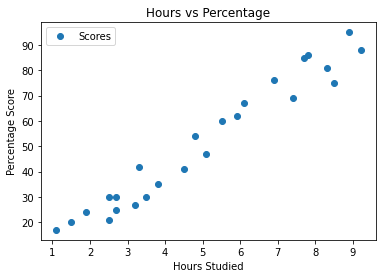

In [21]:
student.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Split into train and test 

In [6]:
X = student.iloc[:, :-1].values  
y = student.iloc[:, 1].values  

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

# Model fitting

In [8]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
lm=regressor.fit(X_train, y_train) 
lm

LinearRegression()

In [9]:
print(lm.intercept_)
print(lm.coef_)

2.0181600414346974
[9.91065648]


# Taking one example

### we fitted a model now we are taking one example ,I took x=8 and cheking its y pediction value by taking intercept and coefficient value putting in y=mx+c equetion

In [10]:
2.018160041434683+9.91065648*8

81.30341188143468

### now we are checking above answer is right or not by using model

In [11]:
X_new = pd.DataFrame({'Hours': [8]})
X_new.head()

,Hours
0,8


In [12]:
lm.predict(X_new)

array([81.30341189])

# By Using OLS method

In [22]:
X_new = pd.DataFrame({'Hours': [student.Hours.min(), student.Hours.max()]})
X_new.head()

,Hours
0,1.1
1,9.2


In [23]:
preds = lm.predict(X_new)
preds

0    13.237057
1    92.421065
dtype: float64

# Best Fit Line 

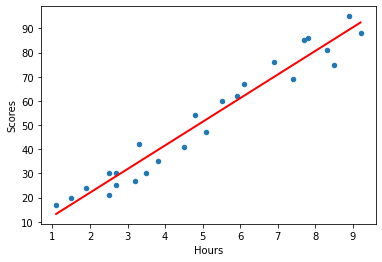

In [25]:
student.plot(kind='scatter', x='Hours', y='Scores')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

In [26]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Scores ~ Hours', data=student).fit()
lm.conf_int()

,0,1
Intercept,-2.753470,7.720817
Hours,8.838823,10.712784


In [27]:
lm.pvalues

Intercept    3.367785e-01
Hours        9.132624e-17
dtype: float64

In [28]:
lm.rsquared

0.9529481969048356

# Accuracy

In [29]:
Accuracy=(lm.rsquared*100)
print("Accuracy of model is",Accuracy,"%")

Accuracy of model is 95.29481969048355 %
